# 1. Unconstrained optimization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def oracle1(x, mode):
    if mode==1:
        return x[0]**2 + x[1]**2 -2*x[0]*x[1]
    if mode==2:
        return x[0]**2 + x[1]**2 -2*x[0]*x[1], np.array([2*x[0] - 2*x[1] , 2*x[1] - 2*x[0]])
    if mode==3:
        return np.array([2*x[0] - 2*x[1] , 2*x[1] - 2*x[0]])
    
    

In [4]:
x=[2,1]
oracle1(x,2)


(1, array([ 2, -2]))

In [5]:
def oracle2(x, mode):
    if mode==1:
        return 10*(x[1]-x[0]**2)**2 + (1-x[0])**2
    if mode==2:
        return 10*(x[1]-x[0]**2)**2 + (1-x[0])**2, np.array([-40*x[0]*(x[1]-x[0]**2) -2 * (1-x[0]), 20*(x[1] - x[0]**2)])
    if mode==3:
        return np.array([-40*x[0]*(x[1]-x[0]**2) -2*(1-x[0]), 20*(x[1] - x[0]**2)])

In [6]:
x=[2,1]
oracle2(x,2)

(91, array([242, -60]))

In [7]:
def oracle3(x, mode):
    if mode==1:
        return 1/2 * np.dot(x,x)
    if mode==2:
        return 1/2 * np.dot(x,x) , np.array(x)
    if mode==3:
        return np.array(x)

In [8]:
x=np.array([2,1])
oracle3(x,2)


(2.5, array([2, 1]))

In [9]:
def norme(x):
    return np.sqrt(np.dot(x,x))

In [10]:
def methode_gradient(oracle, x0, k=0, MaxIt=1000, t=0.5, tol=10e-6):
    x=x0
    list=[x0]
    f=oracle(x, 2)
    while (np.linalg.norm(f[1]) > tol) and (k < MaxIt):
        x= x - t*f[1]
        list.append(x)
        k= k + 1
        f=oracle(x, 2)
    print(x, f, k)
    if k==MaxIt:
        print(f"l'algorithme n'a pas convergé en moins de {MaxIt} itérations ")
    else :
        print(f"l'algorithme a convergé en {k} itérations ")
        print(f"Coordonnées de la solution : {x}")
        print(f"Dernier gradient obtenu : {oracle(x,3)} ")
        print(f"Valeur de la solution : {oracle(x,1)} ")
    x = [list[i][0] for i in range(len(list))]
    y = [list[i][1] for i in range(len(list))]   
    plt.plot(x,y,'ob')
    plt.show()

[0.00000000e+00 4.76837158e-07 9.53674316e-07 1.43051147e-06
 1.90734863e-06 2.38418579e-06 2.86102295e-06 3.33786011e-06
 3.81469727e-06 4.29153442e-06] (3.240074875066057e-11, array([0.00000000e+00, 4.76837158e-07, 9.53674316e-07, 1.43051147e-06,
       1.90734863e-06, 2.38418579e-06, 2.86102295e-06, 3.33786011e-06,
       3.81469727e-06, 4.29153442e-06])) 21
l'algorithme a convergé en 21 itérations 
Coordonnées de la solution : [0.00000000e+00 4.76837158e-07 9.53674316e-07 1.43051147e-06
 1.90734863e-06 2.38418579e-06 2.86102295e-06 3.33786011e-06
 3.81469727e-06 4.29153442e-06]
Dernier gradient obtenu : [0.00000000e+00 4.76837158e-07 9.53674316e-07 1.43051147e-06
 1.90734863e-06 2.38418579e-06 2.86102295e-06 3.33786011e-06
 3.81469727e-06 4.29153442e-06] 
Valeur de la solution : 3.240074875066057e-11 


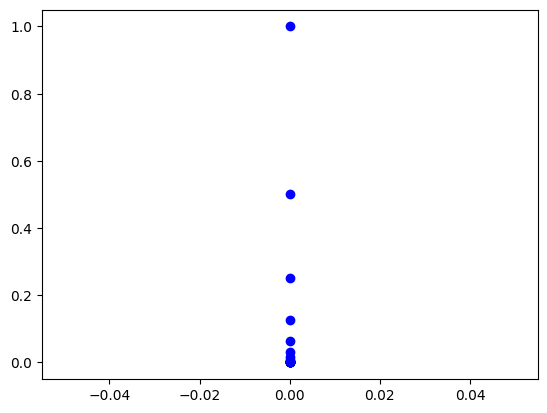

In [11]:
x0=[i for i in range(10)]
#x0=[2,3]
methode_gradient(oracle3, x0)

[6.00000111 5.99999889] (4.888534022029489e-12, array([ 4.42147839e-06, -4.42147839e-06])) 30
l'algorithme a convergé en 30 itérations 
Coordonnées de la solution : [6.00000111 5.99999889]
Dernier gradient obtenu : [ 4.42147839e-06 -4.42147839e-06] 
Valeur de la solution : 4.888534022029489e-12 


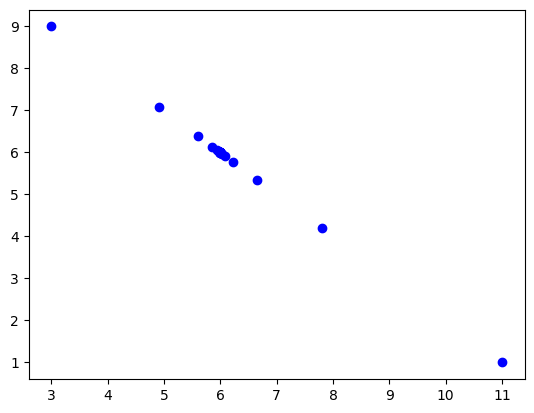

In [12]:
x0=np.array([11,1])
oracle = oracle1
list = methode_gradient(oracle, x0, MaxIt=100, t=0.4)

[12.49990758 12.50009242] (3.416300842218334e-08, array([-0.00036966,  0.00036966])) 250
l'algorithme n'a pas convergé en moins de 250 itérations 


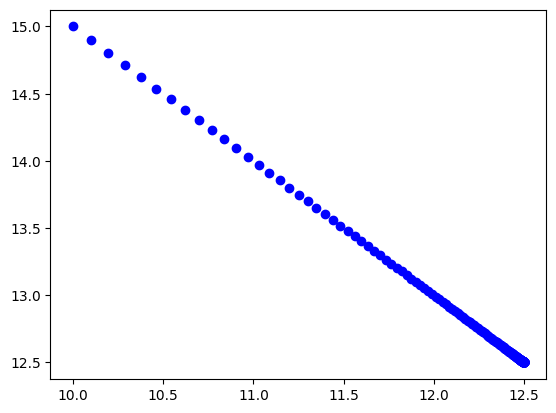

In [13]:
x0=np.array([10,15])
oracle = oracle1
methode_gradient(oracle, x0, MaxIt=250, t=0.01)


C:\Users\valen\AppData\Local\Temp\ipykernel_15592\171636754.py:5: RuntimeWarning: overflow encountered in double_scalars
  return 10*(x[1]-x[0]**2)**2 + (1-x[0])**2, np.array([-40*x[0]*(x[1]-x[0]**2) -2 * (1-x[0]), 20*(x[1] - x[0]**2)])
C:\Users\valen\AppData\Local\Temp\ipykernel_15592\171636754.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return 10*(x[1]-x[0]**2)**2 + (1-x[0])**2, np.array([-40*x[0]*(x[1]-x[0]**2) -2 * (1-x[0]), 20*(x[1] - x[0]**2)])
C:\Users\valen\AppData\Local\Temp\ipykernel_15592\171636754.py:7: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([-40*x[0]*(x[1]-x[0]**2) -2*(1-x[0]), 20*(x[1] - x[0]**2)])
C:\Users\valen\AppData\Local\Temp\ipykernel_15592\171636754.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return 10*(x[1]-x[0]**2)**2 + (1-x[0])**2


[inf inf] (nan, array([nan, nan])) 6
l'algorithme a convergé en 6 itérations 
Coordonnées de la solution : [inf inf]
Dernier gradient obtenu : [nan nan] 
Valeur de la solution : nan 


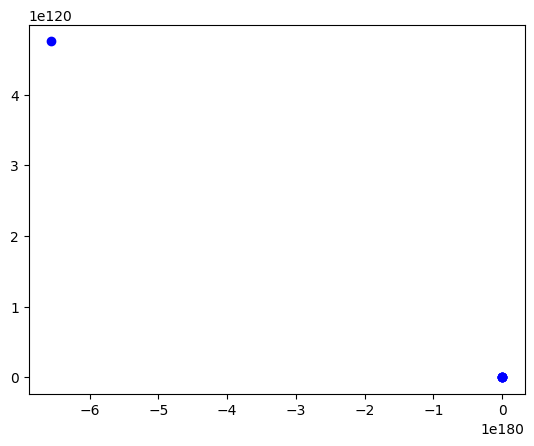

In [14]:
x0=np.array([2,3])
oracle = oracle2
methode_gradient(oracle, x0)

[3.81469727e-06 5.72204590e-06] (2.3646862246096134e-11, array([3.81469727e-06, 5.72204590e-06])) 19
l'algorithme a convergé en 19 itérations 
Coordonnées de la solution : [3.81469727e-06 5.72204590e-06]
Dernier gradient obtenu : [3.81469727e-06 5.72204590e-06] 
Valeur de la solution : 2.3646862246096134e-11 


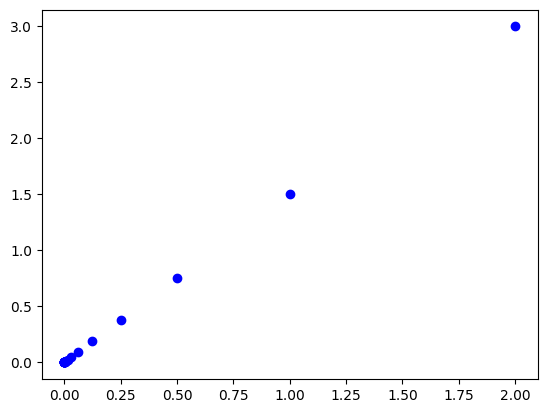

In [15]:
x0=np.array([2,3])
oracle = oracle3
methode_gradient(oracle, x0)

[0.00000000e+00 4.76837158e-07 9.53674316e-07 1.43051147e-06
 1.90734863e-06 2.38418579e-06 2.86102295e-06 3.33786011e-06
 3.81469727e-06 4.29153442e-06] (3.240074875066057e-11, array([0.00000000e+00, 4.76837158e-07, 9.53674316e-07, 1.43051147e-06,
       1.90734863e-06, 2.38418579e-06, 2.86102295e-06, 3.33786011e-06,
       3.81469727e-06, 4.29153442e-06])) 21
l'algorithme a convergé en 21 itérations 
Coordonnées de la solution : [0.00000000e+00 4.76837158e-07 9.53674316e-07 1.43051147e-06
 1.90734863e-06 2.38418579e-06 2.86102295e-06 3.33786011e-06
 3.81469727e-06 4.29153442e-06]
Dernier gradient obtenu : [0.00000000e+00 4.76837158e-07 9.53674316e-07 1.43051147e-06
 1.90734863e-06 2.38418579e-06 2.86102295e-06 3.33786011e-06
 3.81469727e-06 4.29153442e-06] 
Valeur de la solution : 3.240074875066057e-11 


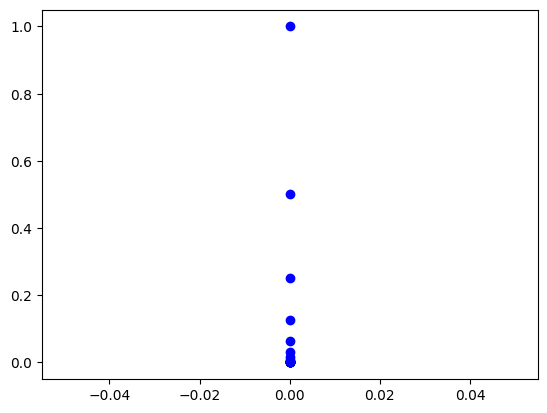

In [16]:
x0=[i for i in range(10)]
oracle = oracle3
methode_gradient(oracle, x0)

[2.49999827 2.50000173] (1.1997514093309292e-11, array([-6.92739213e-06,  6.92739213e-06])) 308
l'algorithme a convergé en 308 itérations 
Coordonnées de la solution : [2.49999827 2.50000173]
Dernier gradient obtenu : [-6.92739213e-06  6.92739213e-06] 
Valeur de la solution : 1.1997514093309292e-11 


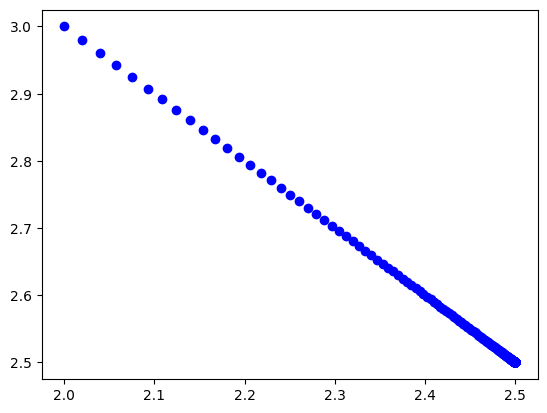

In [17]:
x0=[2,3]
methode_gradient(oracle1, x0, MaxIt=1000 , t=0.01)

C:\Users\valen\AppData\Local\Temp\ipykernel_15592\171636754.py:5: RuntimeWarning: overflow encountered in double_scalars
  return 10*(x[1]-x[0]**2)**2 + (1-x[0])**2, np.array([-40*x[0]*(x[1]-x[0]**2) -2 * (1-x[0]), 20*(x[1] - x[0]**2)])
C:\Users\valen\AppData\Local\Temp\ipykernel_15592\171636754.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return 10*(x[1]-x[0]**2)**2 + (1-x[0])**2, np.array([-40*x[0]*(x[1]-x[0]**2) -2 * (1-x[0]), 20*(x[1] - x[0]**2)])
C:\Users\valen\AppData\Local\Temp\ipykernel_15592\171636754.py:7: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([-40*x[0]*(x[1]-x[0]**2) -2*(1-x[0]), 20*(x[1] - x[0]**2)])
C:\Users\valen\AppData\Local\Temp\ipykernel_15592\171636754.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return 10*(x[1]-x[0]**2)**2 + (1-x[0])**2


[inf inf] (nan, array([nan, nan])) 6
l'algorithme a convergé en 6 itérations 
Coordonnées de la solution : [inf inf]
Dernier gradient obtenu : [nan nan] 
Valeur de la solution : nan 


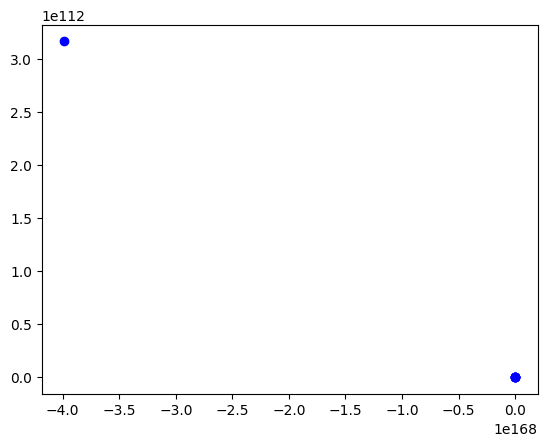

In [18]:
x0=[2,3]
methode_gradient(oracle2, x0, MaxIt = 10 , t = 0.4)

[8.63424948e-05 1.29513742e-04] (1.2114417919449722e-08, array([8.63424948e-05, 1.29513742e-04])) 1000
l'algorithme n'a pas convergé en moins de 1000 itérations 


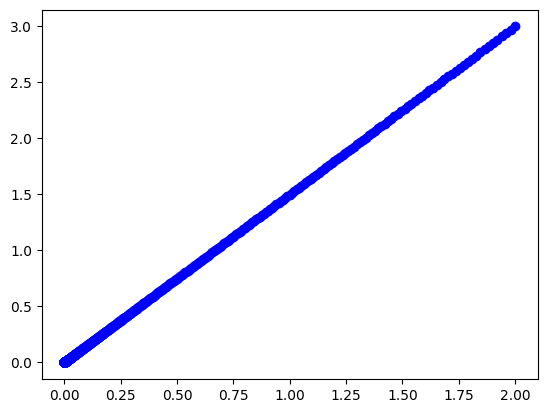

In [19]:
x0=np.array([2,3])
methode_gradient(oracle3, x0, MaxIt = 1000 , t=0.01)

[0.00000000e+00 4.31712474e-05 8.63424948e-05 1.29513742e-04
 1.72684990e-04 2.15856237e-04 2.59027484e-04 3.02198732e-04
 3.45369979e-04 3.88541227e-04] (2.655853159263985e-07, array([0.00000000e+00, 4.31712474e-05, 8.63424948e-05, 1.29513742e-04,
       1.72684990e-04, 2.15856237e-04, 2.59027484e-04, 3.02198732e-04,
       3.45369979e-04, 3.88541227e-04])) 1000
l'algorithme n'a pas convergé en moins de 1000 itérations 


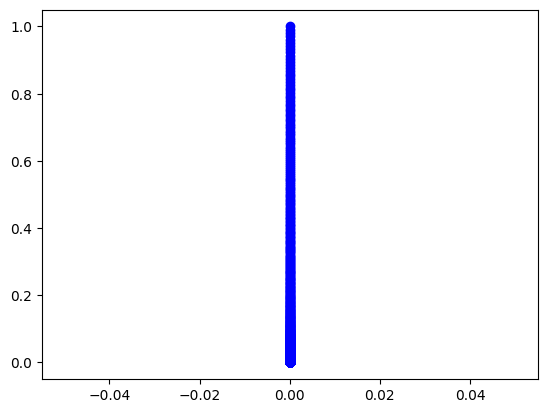

In [20]:
x0=[i for i in range(10)]
methode_gradient(oracle3, x0, MaxIt=1000 , t=0.01)

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  # Fonction pour la 3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

# Tableau pour les 3 axes
inf = -10
sup = 10
N = 50

A = np.zeros((N,N))
Intervalle = np.linspace(inf,sup,N)

for i,x1 in enumerate(Intervalle):
    for j, x2 in enumerate(Intervalle):
        x0=np.array([x1,x2])
        A[i,j] = oracle1(x0,1)


# Tracé du résultat en 3D
fig = plt.figure()
ax = fig.gca(projection='3d')  # Affichage en 3D
ax.plot_surface(X=Intervalle, Y=Intervalle, Z=A, cmap=cm.coolwarm, linewidth=0)  # Tracé d'une surface
plt.title("Fonction")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
plt.show()

plt.show()

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>

In [24]:
def methode_gradient2(oracle, x0, k=0, MaxIt=1000, t=0.5, tol=10e-6):
    x=x0
    list=[x0]
    f=oracle(x, 2)
    z=[f[0]]
    while (norme(f[1]) > tol) and (k < MaxIt):
        x= x - t*f[1]
        list.append(x)
        z.append(f[0])
        k= k + 1
        f=oracle(x, 2)
    print(x, f, k)
    x = [list[i][0] for i in range(len(list))]
    y = [list[i][1] for i in range(len(list))]   
    

    inf = -10
    sup = 10
    N = 50

    A = np.zeros((N,N))
    Intervalle = np.linspace(inf,sup,N)

    for i,x1 in enumerate(Intervalle):
        for j, x2 in enumerate(Intervalle):
            x0=np.array([x1,x2])
            A[i,j] = oracle(x0,1)


    # Tracé du résultat en 3D
    fig = plt.figure()
    ax = fig.gca(projection='3d')  # Affichage en 3D
    ax.plot_surface(X=Intervalle, Y=Intervalle, Z=A, cmap=cm.coolwarm, linewidth=0)  # Tracé d'une surface
    ax.scatter(x, y, z, label='Courbe', marker='d')  # Tracé des points 3D
    plt.title("Fonction")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.tight_layout()
    plt.show()

In [25]:
def Armijo(x, fdex, gradient, t, oracle):
    m1=0.001
    theta=0.2
    p=0
    f1 = oracle(x - t*gradient,1)
    f2 = fdex + m1 * t * np.dot(gradient,-gradient)
    while f1 >= f2 and p<50:
        t = theta * t
        p = p + 1
    #print(t,p,f1,f2)
    return t



In [26]:
def methode_gradient_armijo(oracle, x0, MaxIt=10, t=0.4, tol=10e-6):
    x=x0
    list=[x0]
    f,g=oracle(x, 2)
    k=0
    while (norme(g) > tol) and (k < MaxIt):
        t = Armijo(x, f, g, t, oracle)
        x = x - t * g
        list.append(x)
        k = k + 1
        f,g=oracle(x, 2)
        
    print(x, f, g, k)

In [27]:
x=[1,0]
f,g=oracle1(x,2)
oracle1(x - 0.4*g,1)

0.3600000000000002

In [28]:
x0=np.array([1,0])
methode_gradient_armijo(oracle1, x0, MaxIt=30, t=0.4)

[0.49999858 0.50000142] 8.08286770848099e-12 [-5.68605761e-06  5.68605761e-06] 25


In [29]:
x0=np.array([5,7])
methode_gradient_armijo(oracle2, x0, MaxIt=1100, t=0.4)

[5. 7.] 3256.0 [3608. -360.] 1100


In [30]:
x0=np.array([2,3])
methode_gradient_armijo(oracle3, x0, MaxIt= 100)

[3.41163456e-06 5.11745185e-06] 1.8913781892675437e-11 [3.41163456e-06 5.11745185e-06] 26


In [31]:
def oracle4(x, mode):
    if mode==1:
        return sum(np.arange(1,len(x)+1) * x**2 +10 * x**4)
    if mode==2:
        return sum(np.arange(1,len(x)+1) * x**2 +10 * x**4), np.arange(1,len(x)+1)* x * 2 + 40 * x**3
    if mode==3:
        return np.arange(1,len(x)+1)* x * 2 + 40 * x**3

In [32]:
x=np.array([1,1,1,-1])
oracle4(x,2)

(50, array([ 42,  44,  46, -48]))

In [33]:
methode_gradient_armijo(oracle4, x, MaxIt=4000, t=0.5)

[ 1.  1.  1. -1.] 50.0 [ 42.  44.  46. -48.] 4000


In [34]:
np.dot(x,x)

4

In [24]:
import plotly.graph_objects as go

import pandas as pd

inf = -10
sup = 10
N = 50

A = np.zeros((N,N))
Intervalle = np.linspace(inf,sup,N)

for i,x in enumerate(Intervalle):
    for j, y in enumerate(Intervalle):
        x1=np.array([x,y])
        A[i,j] = oracle3(x1,1)
# Read data from a csv

fig = go.Figure(data=[go.Surface(x=Intervalle, y=Intervalle, z=A)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Fonction 1', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=1),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()
